# Usage (quick version)

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
import warnings

In [3]:
import covsirphy as cs
cs.__version__

'2.7.0'

## Dataset preparation
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.
Download the datasets to "input" direcotry and load them.

If "input" directory has the datasets, `DataLoader` will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically.

In [4]:
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=True)
# Population in each country
population_data = data_loader.population(verbose=True)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=True)

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/


Detailed citaition list:

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

### The number of cases (JHU style)

In [5]:
# Description/citation
print(jhu_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [6]:
print(data_loader.covid19dh_citation)

Australian Bureau of Statistics (2019), https://www.abs.gov.au/
CIA - Central Intelligence Agency (2018), https://www.cia.gov/
CIA - Central Intelligence Agency (2019), https://www.cia.gov/
CIA - Central Intelligence Agency (2020), https://www.cia.gov/
COVID-19 Peru Data Repository (2019), https://github.com/
COVID-19 Peru Data Repository (2020), https://github.com/
COVID-19 Turkey API (2020), https://github.com/
COVID-19_plus_Russia GitHub repository (2020), https://github.com/
COVID19-India API (2020), https://www.covid19india.org/
Canada's National Statistical Agency (2020), https://www150.statcan.gc.ca/
Centre of Excellence in Economics and Data Science, University of Milano (2020), https://github.com/
Covid19data.com.au (2020), https://github.com/
Czech Statistical Office (2018), https://www.czso.cz/
Data Science for Social Impact research group, University of Pretoria (2020), https://github.com/
Epistat, Belgian Infectious Diseases (2020), https://epistat.sciensano.be/
Eurostat (

In [7]:
# Raw data
jhu_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
178407,2020-08-13,6,2,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178408,2020-08-14,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178409,2020-08-15,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178410,2020-08-16,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178411,2020-08-17,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [8]:
# Cleaned data
jhu_data.cleaned().tail()

,Date,Country,Province,Confirmed,Infected,Fatal,Recovered
178407,2020-08-13,Colombia,Vichada,6,4,0,2
178408,2020-08-14,Colombia,Vichada,6,1,0,5
178409,2020-08-15,Colombia,Vichada,6,1,0,5
178410,2020-08-16,Colombia,Vichada,6,1,0,5
178411,2020-08-17,Colombia,Vichada,6,1,0,5


In [9]:
# Subset for a country
jhu_data.subset("Japan", province="Tokyo").tail()

,Date,Confirmed,Infected,Fatal,Recovered
211,2020-08-13,16680,3816,338,12526
212,2020-08-14,17069,3883,338,12848
213,2020-08-15,17454,3842,338,13274
214,2020-08-16,17714,3778,340,13596
215,2020-08-17,17875,3939,340,13596


In [10]:
# Total
total_df = jhu_data.total()
total_df.tail()

,Confirmed,Infected,Fatal,Recovered,Fatal per Confirmed,Recovered per Confirmed,Fatal per (Fatal or Recovered)
Date,,,,,,,
2020-08-13,20933705,7257248,761051,12915406,0.018178,0.308484,0.055647
2020-08-14,21149830,7177822,766182,13205826,0.018113,0.312197,0.054837
2020-08-15,21451686,7319097,772478,13360111,0.018005,0.311400,0.054659
2020-08-16,21651999,7285819,776182,13589998,0.017924,0.313828,0.054028
2020-08-17,21652276,7326171,776182,13549923,0.017924,0.312898,0.054180


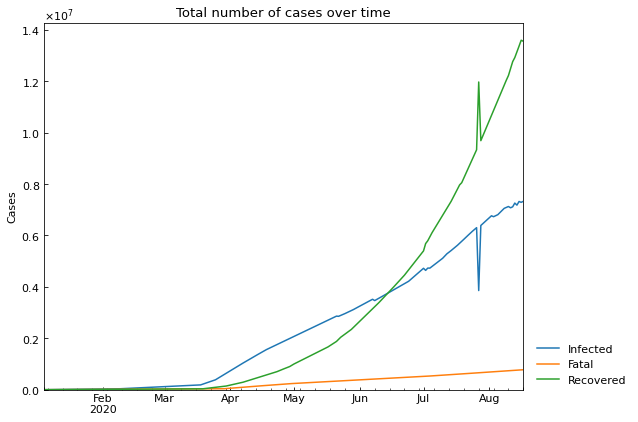

In [11]:
# Plot the total values
cs.line_plot(total_df[["Infected", "Fatal", "Recovered"]], "Total number of cases over time")

### (Optional) Replace the dataset in Japan


In [12]:
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
222,2020-08-13,52534,15344,1076,36114
223,2020-08-14,53894,15338,1085,37471
224,2020-08-15,55121,15097,1092,38932
225,2020-08-16,56140,14962,1103,40075
226,2020-08-17,56416,55313,1103,39561


In [13]:
japan_data = data_loader.japan()
print(japan_data.citation)

Lisphilar (2020), COVID-19 dataset in Japan, GitHub repository, https://github.com/lisphilar/covid19-sir/data/japan

In [14]:
jhu_data.replace(japan_data)
jhu_data.subset("Japan").tail()

,Date,Confirmed,Infected,Fatal,Recovered
184,2020-08-13,51147,13950,1063,36134
185,2020-08-14,52217,13665,1073,37479
186,2020-08-15,53577,13547,1085,38945
187,2020-08-16,54714,13546,1088,40080
188,2020-08-17,55667,13372,1099,41196


### Population in each country

In [15]:
# Description/citation
print(population_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [16]:
# Raw data (the same as jhu_data)
population_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
178407,2020-08-13,6,2,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178408,2020-08-14,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178409,2020-08-15,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178410,2020-08-16,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178411,2020-08-17,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [17]:
# Cleaned data
population_data.cleaned().tail()

,ISO3,Country,Province,Date,Population
174951,COL,Colombia,Vichada,2020-08-13,107808
174952,COL,Colombia,Vichada,2020-08-14,107808
174953,COL,Colombia,Vichada,2020-08-15,107808
174954,COL,Colombia,Vichada,2020-08-16,107808
174955,COL,Colombia,Vichada,2020-08-17,107808


In [18]:
population_data.value("Japan", province=None)

126529100

In [19]:
# Register population value of Tokyo in Japan
# https://www.metro.tokyo.lg.jp/tosei/hodohappyo/press/2020/06/11/07.html
population_data.update(14_002_973, "Japan", province="Tokyo")
population_data.value("Japan", province="Tokyo")

14002973

### Government Response Tracker (OxCGRT)

In [20]:
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Working paper, doi: 10.13140/RG.2.2.11649.81763.
We can get Citation list of primary sources with DataLoader(...).covid19dh_citation

In [21]:
# Raw data (the same as jhu_data)
oxcgrt_data.raw.tail()

,ObservationDate,Confirmed,Recovered,Deaths,Population,ISO3,Province/State,Country/Region,school_closing,workplace_closing,cancel_events,gatherings_restrictions,transport_closing,stay_home_restrictions,internal_movement_restrictions,international_movement_restrictions,information_campaigns,testing_policy,contact_tracing,stringency_index
178407,2020-08-13,6,2,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178408,2020-08-14,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178409,2020-08-15,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178410,2020-08-16,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04
178411,2020-08-17,6,5,0,107808.0,COL,Vichada,Colombia,3,3,2,4,1,2,2,4,2,2,2,87.04


In [22]:
# Cleaned data
oxcgrt_data.cleaned().tail()

,Date,Country,ISO3,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
178407,2020-08-13,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
178408,2020-08-14,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
178409,2020-08-15,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
178410,2020-08-16,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04
178411,2020-08-17,Colombia,COL,3,3,2,4,1,2,2,4,2,2,2,87.04


In [23]:
# Subset for a country
oxcgrt_data.subset("Japan").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
222,2020-08-13,1,1,1,0,0,1,1,3,2,2,1,30.56
223,2020-08-14,1,1,1,0,0,1,1,3,2,2,1,30.56
224,2020-08-15,1,1,1,0,0,1,1,3,2,2,1,30.56
225,2020-08-16,1,1,1,0,0,1,1,3,2,2,1,30.56
226,2020-08-17,1,1,1,0,0,1,1,3,2,2,1,30.56


In [24]:
# Subset for a country (using ISO3 code)
oxcgrt_data.subset("JPN").tail()

,Date,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
222,2020-08-13,1,1,1,0,0,1,1,3,2,2,1,30.56
223,2020-08-14,1,1,1,0,0,1,1,3,2,2,1,30.56
224,2020-08-15,1,1,1,0,0,1,1,3,2,2,1,30.56
225,2020-08-16,1,1,1,0,0,1,1,3,2,2,1,30.56
226,2020-08-17,1,1,1,0,0,1,1,3,2,2,1,30.56


## Scenario analysis
As an example, we will analysis the number of cases in Japan.

In [25]:
scenario = cs.Scenario(jhu_data, population_data, country="Japan", province=None)

### Check records

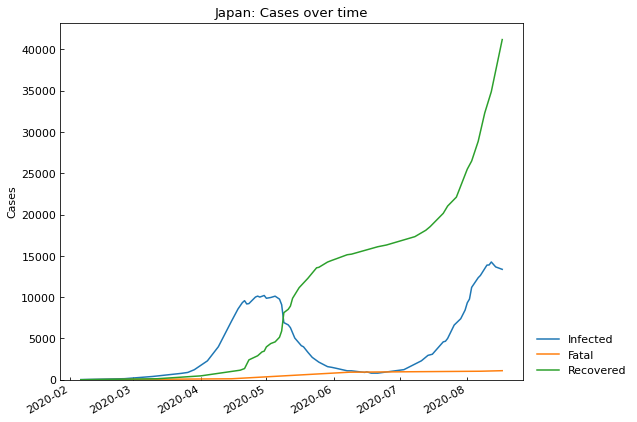

,Date,Confirmed,Infected,Fatal,Recovered
184,2020-08-13,51147,13950,1063,36134
185,2020-08-14,52217,13665,1073,37479
186,2020-08-15,53577,13547,1085,38945
187,2020-08-16,54714,13546,1088,40080
188,2020-08-17,55667,13372,1099,41196


In [26]:
import matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)
record_df = scenario.records()
record_df.tail()

### S-R trend analysis

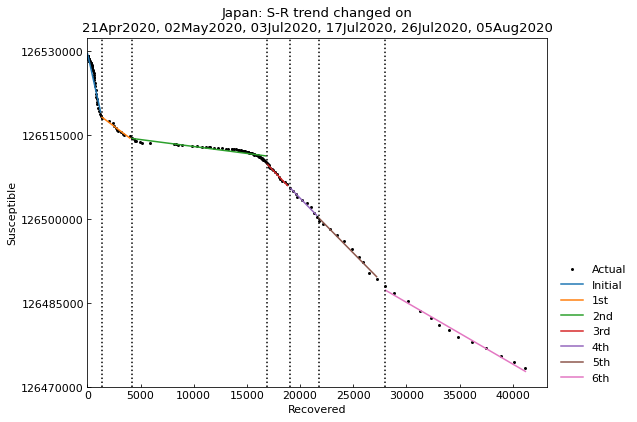

,Type,Start,End,Population
1st,Past,21Apr2020,01May2020,126529100
2nd,Past,02May2020,02Jul2020,126529100
3rd,Past,03Jul2020,16Jul2020,126529100
4th,Past,17Jul2020,25Jul2020,126529100
5th,Past,26Jul2020,04Aug2020,126529100
6th,Past,05Aug2020,17Aug2020,126529100


In [27]:
scenario.trend(set_phases=True)
scenario.summary()

### Hyperparameter estimation of ODE models
As an example, use SIR-F model.
We can use SIR, SIRD, (SIRFV), (SEWIRF).

In [28]:
scenario.estimate(cs.SIRF)


<SIR-F model: parameter estimation>

Running optimization with 4 CPUs...

	6th phase (05Aug2020 - 17Aug2020): finished 1313 trials in 1 min  0 sec

	4th phase (17Jul2020 - 25Jul2020): finished  227 trials in 0 min 10 sec

	5th phase (26Jul2020 - 04Aug2020): finished  228 trials in 0 min 10 sec

	1st phase (21Apr2020 - 01May2020): finished 1152 trials in 1 min  0 sec

	2nd phase (02May2020 - 02Jul2020): finished 1125 trials in 1 min  0 sec

	3rd phase (03Jul2020 - 16Jul2020): finished 1154 trials in 1 min  0 sec

Completed optimization. Total: 2 min  1 sec

In [29]:
scenario.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,alpha1 [-],1/gamma [day],1/beta [day],1/alpha2 [day],RMSLE,Trials,Runtime
1st,Past,21Apr2020,01May2020,126529100,SIR-F,1.26,0.062911,0.000392,0.036335,0.026541,1440,0.063,37,27,2552,0.128628,1152,1 min 0 sec
2nd,Past,02May2020,02Jul2020,126529100,SIR-F,0.22,0.153302,0.000105,0.018859,0.071146,1440,0.153,14,53,9556,0.631129,1125,1 min 0 sec
3rd,Past,03Jul2020,16Jul2020,126529100,SIR-F,2.09,0.000121,0.000299,0.145558,0.069297,1440,0.000,14,6,3339,0.037527,1154,1 min 0 sec
4th,Past,17Jul2020,25Jul2020,126529100,SIR-F,2.07,0.000884,0.000071,0.143342,0.069143,1440,0.001,14,6,14040,0.021291,227,0 min 10 sec
5th,Past,26Jul2020,04Aug2020,126529100,SIR-F,1.91,0.001779,0.000059,0.130377,0.068056,1440,0.002,14,7,16836,0.033854,228,0 min 10 sec
6th,Past,05Aug2020,17Aug2020,126529100,SIR-F,1.15,0.000442,0.000323,0.091611,0.079331,1440,0.000,12,10,3097,0.038301,1313,1 min 0 sec


### Accuracy of estimation

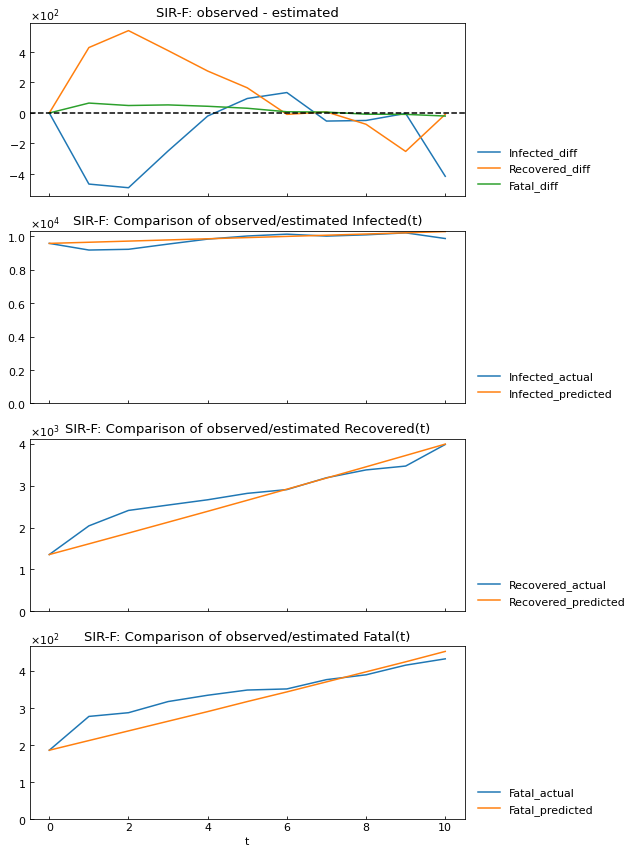

In [30]:
scenario.estimate_accuracy(phase="1st")

### Get parameter value

In [31]:
scenario.get("Rt", phase="4th")

2.07

### Show parameter history

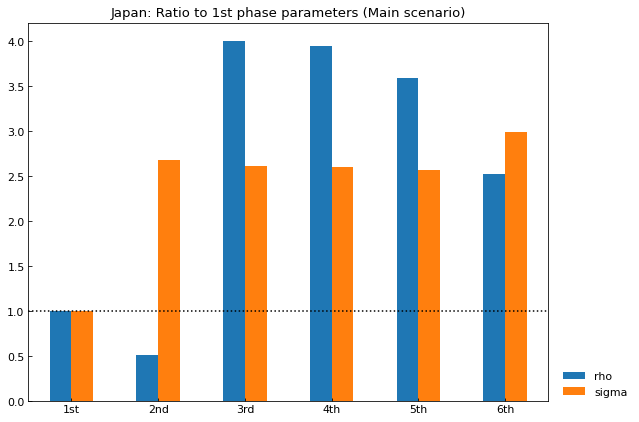

,1st,2nd,3rd,4th,5th,6th
rho,1.0,0.519021,4.005998,3.945010,3.588195,2.521293
sigma,1.0,2.680578,2.610907,2.605128,2.564150,2.988954


In [32]:
df = scenario.param_history(targets=["rho", "sigma"])
df.T

### Show the history of reproduction number

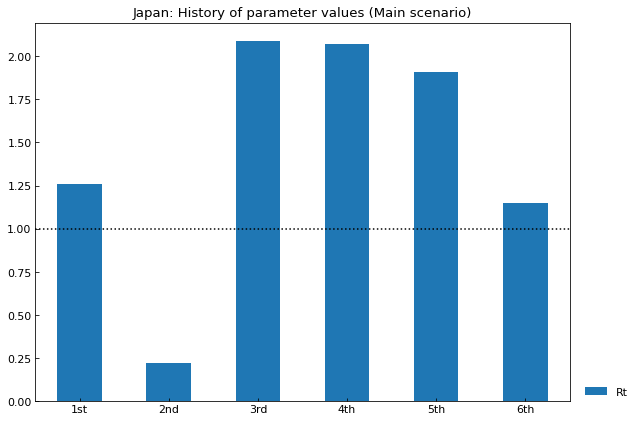

,1st,2nd,3rd,4th,5th,6th
Rt,1.26,0.22,2.09,2.07,1.91,1.15


In [33]:
df = scenario.param_history(targets=["Rt"], divide_by_first=False, show_box_plot=True)
df.T

### Simulate the number of cases

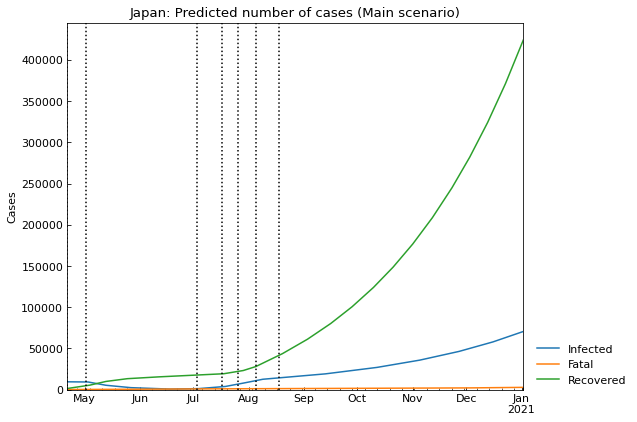

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-12-29,472188,2735,67392,402061
253,2020-12-30,478374,2760,68176,407438
254,2020-12-31,484632,2785,68969,412878
255,2021-01-01,490963,2810,69772,418381
256,2021-01-02,497366,2835,70583,423948


In [34]:
scenario.clear(name="Main")
scenario.add(end_date="01Jan2021", name="Main")
main_sim_df = scenario.simulate(name="Main")
main_sim_df.tail()

### Simulate another scenario
If $\sigma$ will be double in 30 days, how many cases will be?

In [35]:
sigma_current = scenario.get("sigma", name="Main", phase="last")
sigma_current

0.07933057383863634

In [36]:
sigma_new = sigma_current * 2
sigma_new

0.15866114767727268

In [37]:
scenario.clear(name="Medicine")
scenario.add(name="Medicine", days=30, sigma=sigma_current)
scenario.add(name="Medicine", end_date="01Jan2021", sigma=sigma_new)
scenario.summary()

Type      Start        End  Population    ODE    Rt  \
Scenario Phase                                                          
Main     1st      Past  21Apr2020  01May2020   126529100  SIR-F  1.26   
         2nd      Past  02May2020  02Jul2020   126529100  SIR-F  0.22   
         3rd      Past  03Jul2020  16Jul2020   126529100  SIR-F  2.09   
         4th      Past  17Jul2020  25Jul2020   126529100  SIR-F  2.07   
         5th      Past  26Jul2020  04Aug2020   126529100  SIR-F  1.91   
         6th      Past  05Aug2020  17Aug2020   126529100  SIR-F  1.15   
         7th    Future  18Aug2020  01Jan2021   126529100  SIR-F  1.15   
Medicine 1st      Past  21Apr2020  01May2020   126529100  SIR-F  1.26   
         2nd      Past  02May2020  02Jul2020   126529100  SIR-F  0.22   
         3rd      Past  03Jul2020  16Jul2020   126529100  SIR-F  2.09   
         4th      Past  17Jul2020  25Jul2020   126529100  SIR-F  2.07   
         5th      Past  26Jul2020  04Aug2020   126529100  SIR-F  1.91   
         6th      Past  05Aug2020  17Aug2020   126529100  SIR-F  1.15   
         7th    Future  18Aug2020  17Sep2020   126529100  SIR-F  1.15   
         8th    Future  18Sep2020  01Jan2021   126529100  SIR-F  0.58   

                   theta     kappa       rho     sigma   tau  alpha1 [-]  \
Scenario Phase                                                             
Main     1st    0.062911  0.000392  0.036335  0.026541  1440       0.063   
         2nd    0.153302  0.000105  0.018859  0.071146  1440       0.153   
         3rd    0.000121  0.000299  0.145558  0.069297  1440       0.000   
         4th    0.000884  0.000071  0.143342  0.069143  1440       0.001   
         5th    0.001779  0.000059  0.130377  0.068056  1440       0.002   
         6th    0.000442  0.000323  0.091611  0.079331  1440       0.000   
         7th    0.000442  0.000323  0.091611  0.079331  1440       0.000   
Medicine 1st    0.062911  0.000392  0.036335  0.026541  1440       0.063   
         2nd    0.153302  0.000105  0.018859  0.071146  1440       0.153   
         3rd    0.000121  0.000299  0.145558  0.069297  1440       0.000   
         4th    0.000884  0.000071  0.143342  0.069143  1440       0.001   
         5th    0.001779  0.000059  0.130377  0.068056  1440       0.002   
         6th    0.000442  0.000323  0.091611  0.079331  1440       0.000   
         7th    0.000442  0.000323  0.091611  0.079331  1440       0.000   
         8th    0.000442  0.000323  0.091611  0.158661  1440       0.000   

                1/gamma [day]  1/beta [day]  1/alpha2 [day]      RMSLE Trials  \
Scenario Phase                                                                  
Main     1st               37            27            2552   0.128628   1152   
         2nd               14            53            9556   0.631129   1125   
         3rd               14             6            3339  0.0375274   1154   
         4th               14             6           14040  0.0212907    227   
         5th               14             7           16836  0.0338536    228   
         6th               12            10            3097  0.0383013   1313   
         7th               12            10            3097          -      -   
Medicine 1st               37            27            2552   0.128628   1152   
         2nd               14            53            9556   0.631129   1125   
         3rd               14             6            3339  0.0375274   1154   
         4th               14             6           14040  0.0212907    227   
         5th               14             7           16836  0.0338536    228   
         6th               12            10            3097  0.0383013   1313   
         7th               12            10            3097          -      -   
         8th                6            10            3097          -      -   

                     Runtime  
Scenario Phase                
Main     1st    1 min  0 sec  
         2nd

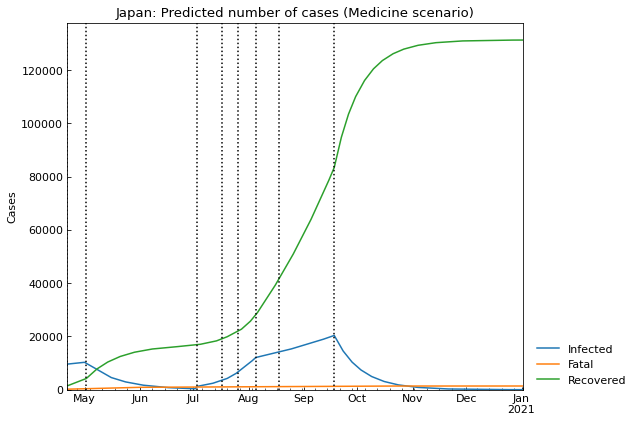

,Date,Confirmed,Fatal,Infected,Recovered
252,2020-12-29,132618,1385,21,131212
253,2020-12-30,132620,1385,20,131215
254,2020-12-31,132621,1385,18,131218
255,2021-01-01,132623,1385,17,131221
256,2021-01-02,132626,1386,16,131224


In [38]:
scenario.simulate(name="Medicine").tail()

### Compare the scenarios

In [39]:
scenario.describe()

,max(Infected),argmax(Infected),Infected on 02Jan2021,Fatal on 02Jan2021,8th_Rt
Main,70583,02Jan2021,70583,2835,-
Medicine,20361,18Sep2020,16,1386,0.58
